In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import spearmanr
from pylab import  rcParams
from pandas import Series, DataFrame

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
#from matlplotlib import rcParams
%matplotlib inline 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
df =pd.read_csv('copy.csv')
df.head()

,Unnamed: 0,state,account_length,area_code,phone_number,international_plan,voice_mail,vmail_message,day_minute,day_call,...,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,customer_service,churn,False
0,0,NJ,137,415,358-1921,no,no,0,243.4,114,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
1,1,OH,84,408,375-9999,yes,no,0,299.4,71,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
2,2,OK,75,415,330-6626,yes,no,0,166.7,113,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0
3,3,AL,118,510,391-8027,yes,no,0,223.4,98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False.,0
4,4,MO,147,415,329-9001,yes,no,0,157.0,79,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False.,0


In [5]:
df.isnull().sum()

Unnamed: 0            0
state                 0
account_length        0
area_code             0
phone_number          0
international_plan    0
voice_mail            0
vmail_message         0
day_minute            0
day_call              0
day_charge            0
eve_minute            0
eve_call              0
eve_charge            0
night_minute          0
night_call            0
night_charge          0
intl_minute           0
intl_call             0
intl_charge           0
customer_service      0
churn                 0
False                 0
dtype: int64

# print distribution of the result

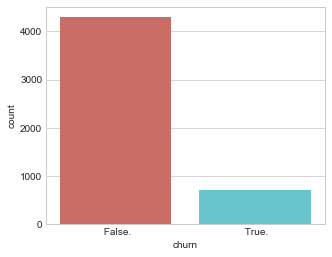

In [6]:
sb.countplot(x='churn',data=df,palette = 'hls')

In [7]:
df.describe()

,Unnamed: 0,account_length,area_code,vmail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,customer_service,False
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,2499.500000,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.0
std,1443.520003,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.0
min,0.000000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1249.750000,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.0
50%,2499.500000,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.0
75%,3749.250000,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.0
max,4999.000000,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
Unnamed: 0            5000 non-null int64
state                 5000 non-null object
account_length        5000 non-null int64
area_code             5000 non-null int64
phone_number          5000 non-null object
international_plan    5000 non-null object
voice_mail            5000 non-null object
vmail_message         5000 non-null int64
day_minute            5000 non-null float64
day_call              5000 non-null int64
day_charge            5000 non-null float64
eve_minute            5000 non-null float64
eve_call              5000 non-null int64
eve_charge            5000 non-null float64
night_minute          5000 non-null float64
night_call            5000 non-null int64
night_charge          5000 non-null float64
intl_minute           5000 non-null float64
intl_call             5000 non-null int64
intl_charge           5000 non-null float64
customer_service      5000 non-nu

In [9]:
df.groupby('state').mean()

,Unnamed: 0,account_length,area_code,vmail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,customer_service,False
state,,,,,,,,,,,,,,,,,,
AK,2473.402778,99.291667,438.611111,9.430556,180.958333,99.541667,30.763333,189.683333,98.986111,16.122917,197.870833,99.111111,8.904028,9.881944,4.652778,2.668750,1.444444,0.0
AL,2464.612903,96.669355,428.290323,6.717742,189.474194,99.129032,32.210887,199.669355,97.596774,16.972097,187.160484,98.177419,8.422419,10.412903,4.500000,2.811694,1.475806,0.0
AR,2819.510870,95.728261,434.858696,10.021739,175.185870,99.923913,29.782065,197.918478,98.445652,16.823370,205.045652,101.206522,9.227283,10.151087,4.750000,2.740870,1.760870,0.0
AZ,2420.213483,103.820225,433.629213,9.662921,176.457303,100.056180,29.998315,195.919101,101.348315,16.653258,191.632584,99.955056,8.623820,10.544944,4.752809,2.847640,1.528090,0.0
CA,2573.903846,100.519231,442.750000,6.307692,172.932692,102.538462,29.399038,194.632692,101.153846,16.544423,199.767308,96.096154,8.989615,9.975000,4.346154,2.694038,1.538462,0.0
CO,2440.572917,98.343750,430.479167,8.583333,176.411458,97.906250,29.990521,204.292708,99.906250,17.364792,188.827083,95.781250,8.497917,9.779167,4.333333,2.640833,1.677083,0.0
CT,2545.656566,96.404040,435.232323,9.333333,175.576768,97.979798,29.848384,201.148485,98.929293,17.097980,202.327273,102.040404,9.105152,10.375758,4.070707,2.801515,1.595960,0.0
DC,2762.329545,101.795455,438.238636,9.886364,172.423864,101.000000,29.313068,197.865909,101.318182,16.819205,210.781818,102.102273,9.485341,10.514773,3.965909,2.839773,1.420455,0.0
DE,2389.468085,96.851064,435.968085,8.170213,183.543617,98.095745,31.203085,206.446809,96.712766,17.548511,206.054255,98.468085,9.272660,10.606383,4.223404,2.865000,1.702128,0.0


In [10]:
y = df['churn']
z=df.state
h=df.phone_number
y = pd.get_dummies(y)[' True.']
X =df.drop(['churn','phone_number','state'],axis=1)

In [11]:
X['international_plan'] = pd.get_dummies(X.international_plan)[' yes']
X['voice_mail'] = pd.get_dummies(X.voice_mail)[' yes']
#pd.get_dummies(X.voice_mail)

In [12]:
X

,Unnamed: 0,account_length,area_code,international_plan,voice_mail,vmail_message,day_minute,day_call,day_charge,eve_minute,eve_call,eve_charge,night_minute,night_call,night_charge,intl_minute,intl_call,intl_charge,customer_service,False
0,0,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
1,1,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
2,2,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
3,3,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
4,4,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
5,5,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
6,6,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,0
7,7,74,415,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0
8,8,168,408,0,0,0,128.8,96,21.90,104.9,71,8.92,141.1,128,6.35,11.2,2,3.02,1,0
9,9,95,510,0,0,0,156.6,88,26.62,247.6,75,21.05,192.3,115,8.65,12.3,5,3.32,3,0


# check that state have little inpact on the result

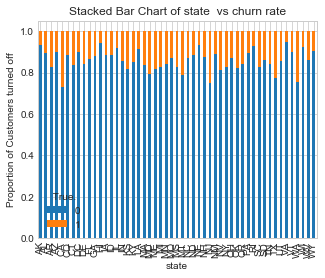

In [13]:
table=pd.crosstab(z,y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of state  vs churn rate')
plt.xlabel('state')
plt.ylabel('Proportion of Customers turned off')
plt.savefig('state vs churn')

In [14]:
hh=[]
for i in h[:500]:
    
    strlist = i.split('-')
    m=(int(strlist[0])-300)/20
     
    hh.append(int(m) )

In [15]:
#print(hh)
#table3=pd.crosstab(hh,y[:500])
#table3.div(table3.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [17]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)
#print (LogReg.score(X,y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pred =LogReg.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93      2143
          1       0.63      0.16      0.25       357

avg / total       0.84      0.87      0.83      2500



In [19]:
print (metrics.accuracy_score(y_test,y_pred))

0.8664


In [20]:
LogReg.score(X_test, y_test)

0.8664

In [21]:
y_test.mean()

0.1428

In [22]:
1-y_test.mean()

0.8572

In [23]:
print (metrics.confusion_matrix(y_test,y_pred))

[[2110   33]
 [ 301   56]]


In [24]:
confusion = metrics.confusion_matrix(y_test,y_pred)
TP= confusion [1,1]
TN = confusion [0,0]
FP =confusion [0,1]
FN = confusion [1,0]

In [25]:
y_pred_prob= LogReg.predict_proba(X_test)[:,1]

# check prediction  probability distribution and draw roc curve

(0, 1)

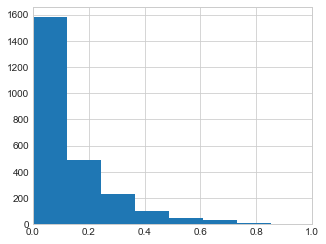

In [26]:
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)

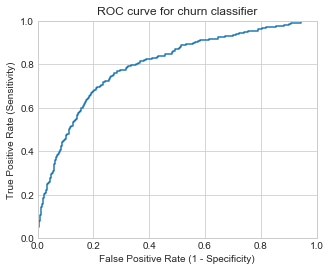

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for churn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [28]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [29]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7965351329519208


# cross validation

In [30]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.863


# try to optimise the model to choose relevant feature automatically

In [31]:
data=df.drop(['phone_number','state'],axis=1)
cat_vars=['account_length','area_code','international_plan','voice_mail','vmail_message','day_minute','day_call','day_charge','eve_minute','eve_call','eve_charge','night_minute','night_call','night_charge','intl_minute','intl_call','intl_charge','customer_service']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['account_length','area_code','international_plan','voice_mail','vmail_message','day_minute','day_call','day_charge','eve_minute','eve_call','eve_charge','night_minute','night_call','night_charge','intl_minute','intl_call','intl_charge','customer_service']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final_vars=data_final.columns.values.tolist()
y2=['churn']
X2=[i for i in data_final_vars if i not in y2]

In [32]:
data_final[y2]

,churn
0,False.
1,False.
2,False.
3,False.
4,False.
5,False.
6,True.
7,False.
8,False.
9,False.


In [33]:
y3=data_final[y2].values.ravel()

In [34]:
y3.mean

<function ndarray.mean>

In [35]:
train_y=[]
for i in y3:
    if i == ' True.':
        train_y.append( 1)
    else:
        train_y.append(0)

In [36]:
xxx=data_final[X2]
xxx.head(100)

,Unnamed: 0,False,account_length_1,account_length_2,account_length_3,account_length_4,account_length_5,account_length_6,account_length_7,account_length_8,...,customer_service_0,customer_service_1,customer_service_2,customer_service_3,customer_service_4,customer_service_5,customer_service_6,customer_service_7,customer_service_8,customer_service_9
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [37]:
xxx.columns

Index(['Unnamed: 0', 'False', 'account_length_1', 'account_length_2',
       'account_length_3', 'account_length_4', 'account_length_5',
       'account_length_6', 'account_length_7', 'account_length_8',
       ...
       'customer_service_0', 'customer_service_1', 'customer_service_2',
       'customer_service_3', 'customer_service_4', 'customer_service_5',
       'customer_service_6', 'customer_service_7', 'customer_service_8',
       'customer_service_9'],
      dtype='object', length=11367)

# however the fit is unable to stop due to a exceeding amount of features

In [38]:
from sklearn import datasets
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(xxx.head(100),train_y[:100] )
print(rfe.support_)
print(rfe.ranking_)

KeyboardInterrupt: 

In [ ]:
#automatic feature selection is impossible due to a large number of distint states

In [ ]:
df['state'].unique()

In [ ]:
dd